# Understanding data variables

**This will help to understand the importance of each variable and their relevance in the dataset and how to deal with any of the column with missing rows.**

Make - car marker
Model - car model
Year - year the car was manufactured
Engine Fuel Type - engine fuel type
Engine HP - engine horse power(HP) i.e the power an engine produces
Engine Cylinders - engine cylinders
Transmission Type - transmission type
Driven_Wheels - driven wheels
Number of Doors - number of doors in car
Market Category - category the car fits in
Vehicle Size - Vehicle Style
highway MPG - highway speed depending on the gallon of petrol or diesel in its tank
city mpg - city speed
Popularity - popularity of the car among twitter users where the data was extracted from
MSRP - manufacturer suggested retail price

**Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the Dataset**

In [6]:
data=pd.read_csv("data_car.csv")

# Exploratory Data analysis

In [7]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [8]:
#checking for basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
#checking for null values in the dataset
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [18]:
[features for features in data.columns if data[features].isnull().sum()>0]

['Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Market Category']

In [13]:
#shape of the dataset 
data.shape

(11914, 16)

In [14]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [15]:
#datatype of the column features
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [16]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [17]:
data[data.duplicated()] 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [19]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [22]:
#checking for duplicate rows in the dataset
duplicate_rows=data.duplicated()

In [23]:
#removing dupicate rows from the dataset
data=data[~duplicate_rows]

In [24]:
data[data.duplicated()] 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [25]:
data.head(15)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [27]:
data.shape

(11199, 16)

In [29]:
data.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [30]:
data['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [32]:
data['Make'].nunique()

48

In [33]:
data['Year'].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

In [37]:
data['Model'].value_counts()

Silverado 1500    156
Tundra            129
F-150             126
Sierra 1500        90
Frontier           76
                 ... 
M4 GTS              1
LFA                 1
Horizon             1
GS F                1
Zephyr              1
Name: Model, Length: 915, dtype: int64

In [77]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [38]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [39]:
data['Number of Doors'].unique()

array([ 2.,  4.,  3., nan])

In [41]:
data['Number of Doors'].isnull().sum()

6

In [42]:
data['Driven_Wheels'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [43]:
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.336208,-0.034148,0.247574,0.244972,0.188417,0.085874,0.209635
Engine HP,0.336208,1.000000,0.788433,-0.129278,-0.415452,-0.446855,0.042499,0.659174
Engine Cylinders,-0.034148,0.788433,1.000000,-0.149877,-0.617420,-0.598708,0.038640,0.538712
Number of Doors,0.247574,-0.129278,-0.149877,1.000000,0.114673,0.120682,-0.057235,-0.144925
highway MPG,0.244972,-0.415452,-0.617420,0.114673,1.000000,0.886299,-0.017159,-0.166631
city mpg,0.188417,-0.446855,-0.598708,0.120682,0.886299,1.000000,-0.000549,-0.162343
Popularity,0.085874,0.042499,0.038640,-0.057235,-0.017159,-0.000549,1.000000,-0.048371
MSRP,0.209635,0.659174,0.538712,-0.144925,-0.166631,-0.162343,-0.048371,1.000000


# Data Visualization

**Univariate Analysis**

<AxesSubplot:xlabel='MSRP', ylabel='Density'>

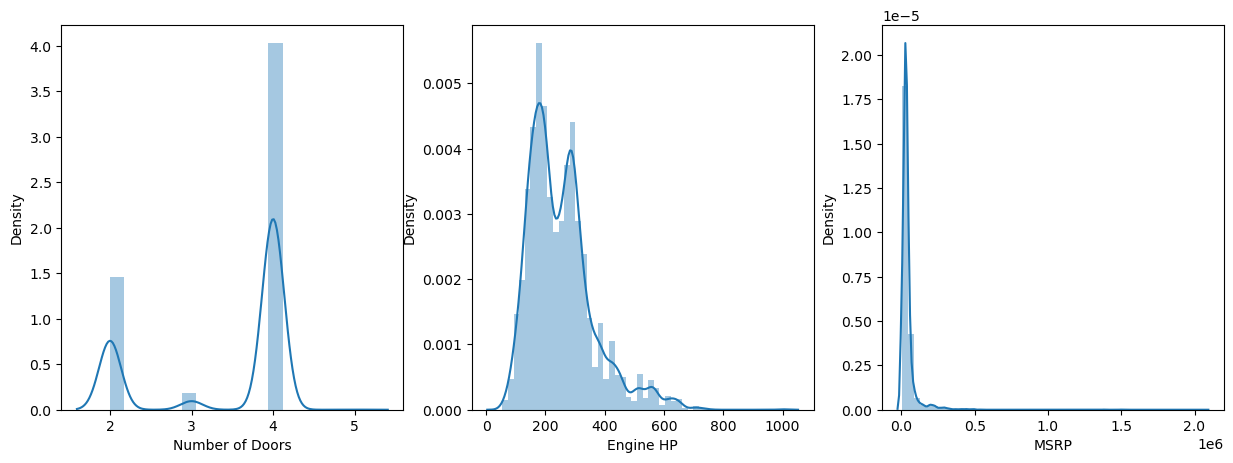

In [101]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data['Number of Doors'], ax=axs[0])
sns.distplot(data['Engine HP'],ax=axs[1])
sns.distplot( data['MSRP'], ax=axs[2])

In [56]:
data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [54]:
import plotly.express as px
def value_count(data, cat_col):
    """function to print number of unique values in category column and visualise the top 5 count"""
    if data[cat_col].dtype == 'object':
        number_of_makers = data[cat_col].nunique()
        print(f'Number of unique car {cat_col} available in the dataset is: {number_of_makers}')
            
    framed_data = data[cat_col].value_counts().to_frame().reset_index()[:5]
    fig = px.bar(framed_data, 
                 x = framed_data.iloc[:,0],
                 y = framed_data.iloc[:,1],
                 title = cat_col,
                 height = 600,
                 width = 800,
                 color_discrete_sequence = ['darkgreen'], 
                 labels = {'x': cat_col, 
                           'y': (f'count of {cat_col}')}
                ) 
    fig.show()

value_count(data, 'Make')

Number of unique car Make available in the dataset is: 48


In [55]:
value_count(data, 'Model')

Number of unique car Model available in the dataset is: 915


In [57]:
value_count(data, 'Engine Fuel Type')

Number of unique car Engine Fuel Type available in the dataset is: 10


In [58]:
value_count(data, 'Transmission Type')

Number of unique car Transmission Type available in the dataset is: 5


In [59]:
value_count(data, 'Driven_Wheels')

Number of unique car Driven_Wheels available in the dataset is: 4


In [60]:
value_count(data, 'Vehicle Size')

Number of unique car Vehicle Size available in the dataset is: 3


In [61]:
value_count(data, 'Vehicle Style')

Number of unique car Vehicle Style available in the dataset is: 16


**Bi Variate Analysis**

The correlation matrix helps us to understand how changes in one variable also causes a change in another variable.

<AxesSubplot:>

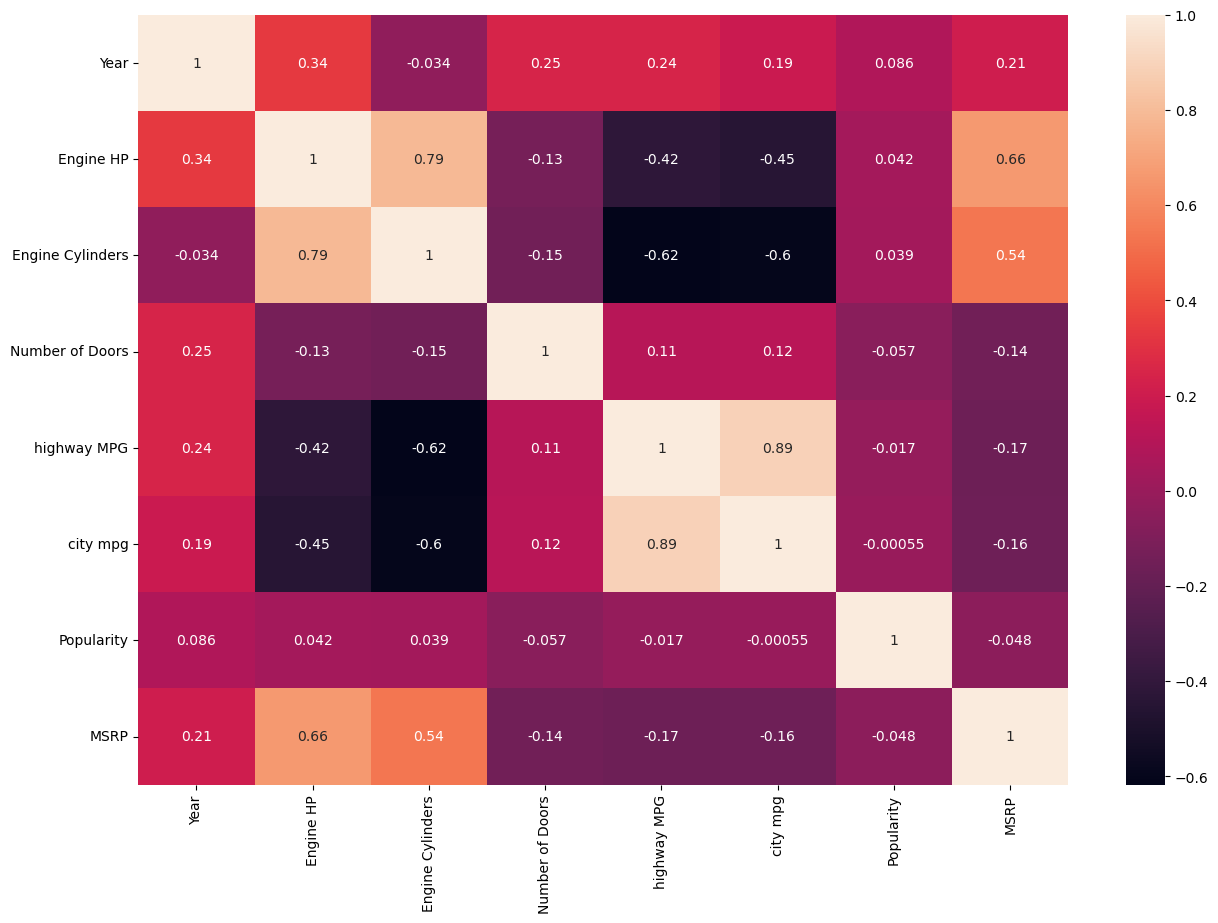

In [62]:
#CHECKING FOR CORRELARION BETWEEN FEATURES
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

# **Data Pre-Processing**

# Handling Missing Values

In [76]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [63]:
[features for features in data.columns if data[features].isnull().sum()>0]

['Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Market Category']

**Missing Values in no.of doors column**

In [69]:
def get_missing_values(data,column_name):
    missing_values = data[data[column_name].isnull()]
    print(f"Missing values in column '{column_name}':")
    print(missing_values)
column_name = 'Number of Doors'    
get_missing_values(data,column_name)

Missing values in column 'Number of Doors':
         Make    Model  Year             Engine Fuel Type  Engine HP  \
4666  Ferrari       FF  2013  premium unleaded (required)      651.0   
6930    Tesla  Model S  2016                     electric        NaN   
6931    Tesla  Model S  2016                     electric        NaN   
6932    Tesla  Model S  2016                     electric        NaN   
6933    Tesla  Model S  2016                     electric        NaN   
6934    Tesla  Model S  2016                     electric        NaN   

      Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
4666              12.0  AUTOMATED_MANUAL   all wheel drive              NaN   
6930               0.0      DIRECT_DRIVE   all wheel drive              NaN   
6931               0.0      DIRECT_DRIVE   all wheel drive              NaN   
6932               0.0      DIRECT_DRIVE   all wheel drive              NaN   
6933               0.0      DIRECT_DRIVE  rear wheel dri

Carried out a research on the number of doors each make model with missing value of door have, so as to fill the missing values.
For Ferrari FF 2013 there are 3 doors and for Tesla Model S there are 5 doors.

In [70]:
data.loc[(data['Number of Doors'].isnull()) & (data['Make'] == 'Ferrari'), 'Number of Doors'] = 3
data.loc[(data['Number of Doors'].isnull())  & (data['Make'] == 'Tesla'), 'Number of Doors'] = 5

In [74]:
data['Number of Doors'].isna().sum()

0

**Missing Values in Engine Fuel Type column**

In [75]:
def get_missing_values(data,column_name):
    missing_values = data[data[column_name].isnull()]
    print(f"Missing values in column '{column_name}':")
    print(missing_values)
column_name = 'Engine Fuel Type'    
get_missing_values(data,column_name)

Missing values in column 'Engine Fuel Type':
         Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499  


Filled missing value of engine fuel type for Suzuki Verona as regular unleaded.(i got the information from a website

In [ ]:
data.loc[(data['Engine Fuel Type'].isnull())  & (data['Make'] == 'Suzuki'), 'Engine Fuel Type'] = 'Regular unleaded'

In [79]:
data['Engine Fuel Type'].isna().sum()

0

**Missing value in engine cylinders column**

In [80]:
def get_missing_values(data,column_name):
    missing_values = data[data[column_name].isnull()]
    print(f"Missing values in column '{column_name}':")
    print(missing_values)
column_name = 'Engine Cylinders'    
get_missing_values(data,column_name)

Missing values in column 'Engine Cylinders':
            Make    Model  Year             Engine Fuel Type  Engine HP  \
1983   Chevrolet  Bolt EV  2017                     electric      200.0   
1984   Chevrolet  Bolt EV  2017                     electric      200.0   
3716  Volkswagen   e-Golf  2015                     electric      115.0   
3717  Volkswagen   e-Golf  2015                     electric      115.0   
3718  Volkswagen   e-Golf  2016                     electric      115.0   
3719  Volkswagen   e-Golf  2016                     electric      115.0   
5778  Mitsubishi   i-MiEV  2014                     electric        NaN   
5779  Mitsubishi   i-MiEV  2016                     electric       66.0   
5780  Mitsubishi   i-MiEV  2017                     electric       66.0   
8373      Toyota  RAV4 EV  2012                     electric      154.0   
8695       Mazda     RX-7  1993             regular unleaded      255.0   
8696       Mazda     RX-7  1994             regular unl

1.For Chevrolet Bolt EV it is an electric vehicle and does not use an engine cylinder.(You never go to the gas station because the Bolt doesn't have an engine, gas tank, or a tailpipe. The Chevrolet Volt (with a V) is a plug-in hybrid. It has two power plants. The Volt uses both a battery to power an electric motor and a gas tank to power an internal combustion engine.)
2.Mazda RX-8 have 4 engine cylinder.
3.Mazda RX-7 have 4 engine cylinder.
4.Toyota RAV4 EV have 4 engine cylinder.
5.Volkswagen e-Golf is an electric vehicle and does not use engine cylinder.
6.Mitsubishi i-MiEV have no engine vbecause it has a enlectric motor.

In [85]:
data.loc[((data['Engine Cylinders'].isna())  & (data['Make'] == 'Mazda') & (data['Model'] == 'RX-8')) |((data['Engine Cylinders'].isna())  & (data['Make'] == 'Mazda') & (data['Model'] == 'RX-7'))
            | ((data['Engine Cylinders'].isna())  & (data['Make'] == 'Toyota') & (data['Model'] == 'RAV4 EV')), 
             'Engine Cylinders'] = 4

data.loc[data['Engine Cylinders'].isna(), 'Engine Cylinders'] = 0

In [86]:
data['Engine Cylinders'].isna().sum()

0

**Missing value in engine hp column**

In [87]:
def get_missing_values(data,column_name):
    missing_values = data[data[column_name].isnull()]
    print(f"Missing values in column '{column_name}':")
    print(missing_values)
column_name = 'Engine HP'    
get_missing_values(data,column_name)

Missing values in column 'Engine HP':
         Make        Model  Year                Engine Fuel Type  Engine HP  \
539      FIAT         500e  2015                        electric        NaN   
540      FIAT         500e  2016                        electric        NaN   
541      FIAT         500e  2017                        electric        NaN   
2905  Lincoln  Continental  2017  premium unleaded (recommended)        NaN   
2906  Lincoln  Continental  2017  premium unleaded (recommended)        NaN   
...       ...          ...   ...                             ...        ...   
9850      Kia      Soul EV  2015                        electric        NaN   
9851      Kia      Soul EV  2015                        electric        NaN   
9852      Kia      Soul EV  2016                        electric        NaN   
9853      Kia      Soul EV  2016                        electric        NaN   
9854      Kia      Soul EV  2016                        electric        NaN   

      Engine 

In [95]:
data.loc[((data['Engine HP'].isna())  & (data['Make'] == 'Chevrolet') & (data['Model'] == 'Impala') 
              & (data['Year'] == 2015)), 'Engine HP'] = 305
data.loc[((data['Engine HP'].isna())  & (data['Make'] == 'Chevrolet') & data['Model'] == 'Impala') 
              & (data['Year'] == 2016), 'Engine HP'] = 196
data.loc[((data['Engine HP'].isna())  & (data['Make'] == 'Chevrolet') & (data['Model'] == 'Impala') 
              & (data['Year'] == 2017)), 'Engine HP'] = 197

# fiat
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'FIAT') & (data['Model'] == '500e'), 'Engine HP'] = 111

# ford
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Ford') & (data['Model'] == 'Escape'), 'Engine HP'] = 180
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Ford') & (data['Model'] == 'Focus'), 'Engine HP'] = 160
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Ford') & (data['Model'] == 'Freestar'), 'Engine HP'] = 193

# honda
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Honda') & (data['Model'] == 'Fit EV'), 'Engine HP'] = 123

# kia
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Kia') & (data['Model'] == 'Soul EV'), 'Engine HP'] = 147

# lincoln
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Lincoln') & (data['Model'] == 'Continental'), 'Engine HP'] = 305
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Lincoln') & (data['Model'] == 'MKZ'), 'Engine HP'] = 245

# mercedes benz
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Mercedes-Benz') & (data['Model'] == 'M-Class'), 'Engine HP'] = 302

# mitsubishi
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Mitsubishi') & (data['Model'] == 'i-MiEV'), 'Engine HP'] = 66

# nissan
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Nissan') & (data['Model'] == 'Leaf'), 'Engine HP'] = 107

# tesla
data.loc[((data['Engine HP'].isna())  & (data['Make'] == 'Tesla') & (data['Model'] == 'Model S') 
             & data['Year'] == 2014), 'Engine HP'] = 362
data.loc[((data['Engine HP'].isna())  & (data['Make'] == 'Tesla') & (data['Model'] == 'Model S')
             & data['Year'] == 2015), 'Engine HP'] = 422
data.loc[((data['Engine HP'].isna())  & (data['Make'] == 'Tesla') & (data['Model'] == 'Model S')
             & (data['Year'] == 2016)), 'Engine HP'] = 315

# toyota
data.loc[(data['Engine HP'].isna())  & (data['Make'] == 'Toyota') & (data['Model'] == 'RAV4 EV'), 'Engine HP'] = 154

**Missing value in market category column**

There are 3376 rows missing in maket category column. But because there is little prediction this column might suggest to our model, the column will be dropped.

In [97]:
data = data.drop(columns = 'Market Category', axis = 1)

# Detect and Handling Outliers

Outliers are irregular or abnormal observation samples that are unlike other observation in the dataset. Inorder to prevent this abnormal samples from distorting the statistical analysis, this outliers will have to handled using interquartile-range (IQR) approach.

Interquartile range (IQR = Q3 - Q1) detect outliers and is used on skewed data distribution. Data points that falls below Q1-1.5 IQR (where Q1 is 25) and above Q3+1.5 IQR (where Q1 is 75) are categorised as outliers. For this analysis we will be concentrating on the predicting class, which is the price(msrp).

In [99]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

<AxesSubplot:xlabel='MSRP'>

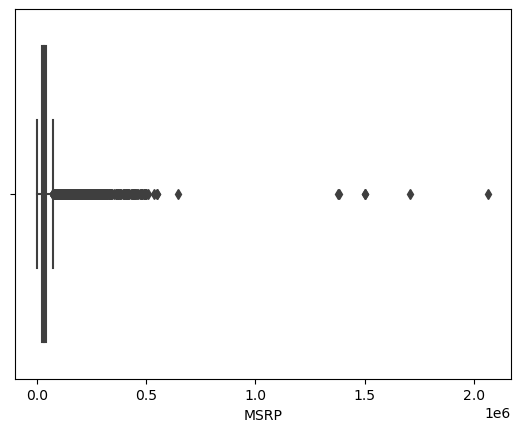

In [108]:
sns.boxplot(x=data['MSRP'])

In [111]:
new_data=data.copy()

In [112]:
def remove_outliers(data, column):
    """function to calculate IQR and to remove outliers from the dataset"""
    # to get the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # get the upper and lower limit
    iqr = Q3 - Q1

    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr 

    # cap number below Q1 and above Q3 as outliers
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                   np.where(data[column] < lower_limit, lower_limit, data[column]))
    return  data

data = remove_outliers(new_data, 'MSRP')


Before: 



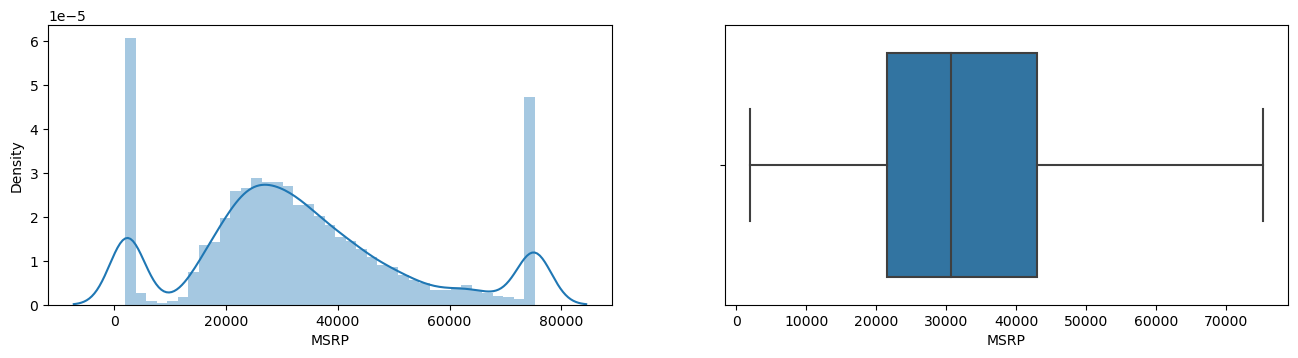

After: 



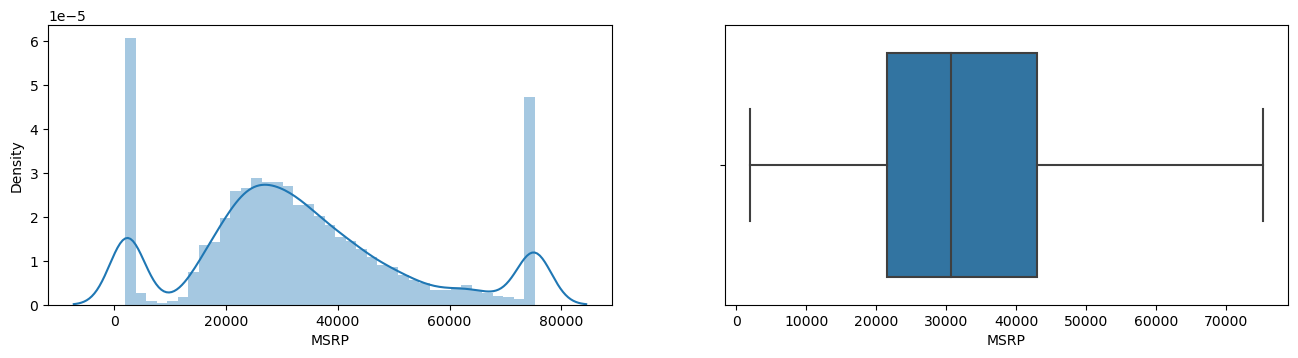

In [118]:
# visualise result before and after removing outliers
print('Before: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_data['MSRP'])  # histogragh

plt.subplot(2,2,2)
sns.boxplot(new_data['MSRP'])    #boxplot
plt.show()

print('After: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.distplot(data['MSRP'])

plt.subplot(2,2,4)
sns.boxplot(data['MSRP'])
plt.show()

In [121]:
data.groupby(['Make']).MSRP.mean().reset_index().sort_values(by = 'MSRP',ascending = False)[:10]

,Make,MSRP
30,McLaren,75182.000000
2,Aston Martin,75182.000000
22,Lamborghini,75182.000000
28,Maybach,75182.000000
5,Bentley,75182.000000
6,Bugatti,75182.000000
41,Spyker,75182.000000
38,Rolls-Royce,75182.000000
13,Ferrari,75182.000000
27,Maserati,74877.854545


# MOdelling

Based on the type of data in use and the expected outcome of the analysis, a supervised machine learning regression model is applied on the dataset. Regression model are use to solve regression problems i.e how a dependent variable is affected by the independent variable.

In [162]:
X=data.drop(['MSRP','Engine HP'],axis=1)

In [163]:
X.isna().sum()

Year                                0
Engine Cylinders                    0
Number of Doors                     0
highway MPG                         0
city mpg                            0
                                   ..
Vehicle Style_Passenger Minivan     0
Vehicle Style_Passenger Van         0
Vehicle Style_Regular Cab Pickup    0
Vehicle Style_Sedan                 0
Vehicle Style_Wagon                 0
Length: 1001, dtype: int64

In [164]:
y=data['MSRP']

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [168]:
data = pd.get_dummies(data, drop_first = True)

In [169]:

data = data.copy()
    
    
   

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns, index = X_test.index)
    



In [ ]:
# training model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Random forest": RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor()
}

for item, model in models.items():
    model.fit(X_train, y_train)
    print("Trained",item)

Trained Random forest


In [ ]:
for name, model in models.items():
     print(name + ' ' + 'Rˆ2 Score: {:.3f}'.format(model.score(X, y_test)))